      delta  czz_diag  cxx_diag
0  0.300000  0.959292  0.010578
1  0.358621  0.941170  0.015566
2  0.417241  0.918976  0.021933
3  0.475862  0.891804  0.030134
4  0.534483  0.858120  0.040925
   delta     type  czz_diag  czz_diag_error  cxx_diag  cxx_diag_error
0    0.4  support    0.9367        0.002536  0.068960        0.004083
1    0.5    novel    0.8789        0.003427  0.126598        0.005425
2    0.6  support    0.7893        0.004293  0.206040        0.005718
3    0.7    novel    0.6841        0.005003  0.295821        0.005882
4    0.8  support    0.5659        0.005469  0.387935        0.005782


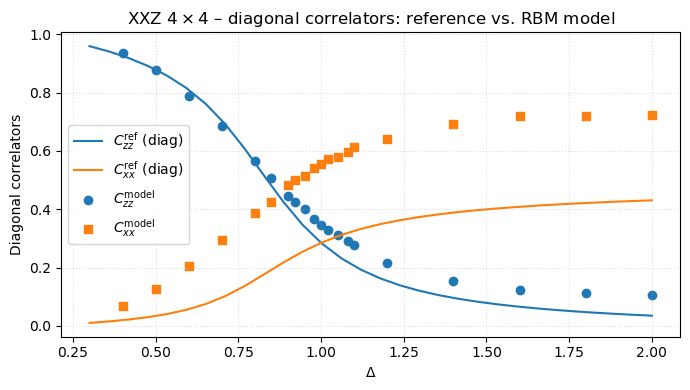

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
ref_df   = pd.read_csv("xxz_4x4_correlations_ref.csv")
model_df = pd.read_csv("xxz_4x4_correlations_rbm.csv")

# quick sanity check
print(ref_df.head())
print(model_df.head())

# plot
fig, ax = plt.subplots(figsize=(7, 4))

# reference curves (lines)
ax.plot(ref_df["delta"], ref_df["czz_diag"], label=r"$C_{zz}^{\rm ref}$ (diag)")
ax.plot(ref_df["delta"], ref_df["cxx_diag"], label=r"$C_{xx}^{\rm ref}$ (diag)")

# model points (markers, no error bars)
ax.scatter(model_df["delta"], model_df["czz_diag"], label=r"$C_{zz}^{\rm model}$", marker="o")
ax.scatter(model_df["delta"], model_df["cxx_diag"], label=r"$C_{xx}^{\rm model}$", marker="s")

ax.set_xlabel(r"$\Delta$")
ax.set_ylabel("Diagonal correlators")
ax.set_title(r"XXZ $4\times 4$ – diagonal correlators: reference vs. RBM model")
ax.legend()
ax.grid(True, linestyle=":", alpha=0.4)

plt.tight_layout()
plt.show()


      delta  czz_diag  cxx_diag
0  0.300000  0.959292  0.010578
1  0.358621  0.941170  0.015566
2  0.417241  0.918976  0.021933
3  0.475862  0.891804  0.030134
4  0.534483  0.858120  0.040925
   delta     type  czz_diag  czz_diag_error  cxx_diag  cxx_diag_error
0    0.4  support    0.9222        0.002719  0.068438        0.004174
1    0.5    novel    0.8774        0.003426  0.112568        0.004645
2    0.6  support    0.7962        0.004265  0.182242        0.005790
3    0.7    novel    0.6804        0.005066  0.272153        0.005468
4    0.8  support    0.5350        0.005552  0.386752        0.005692


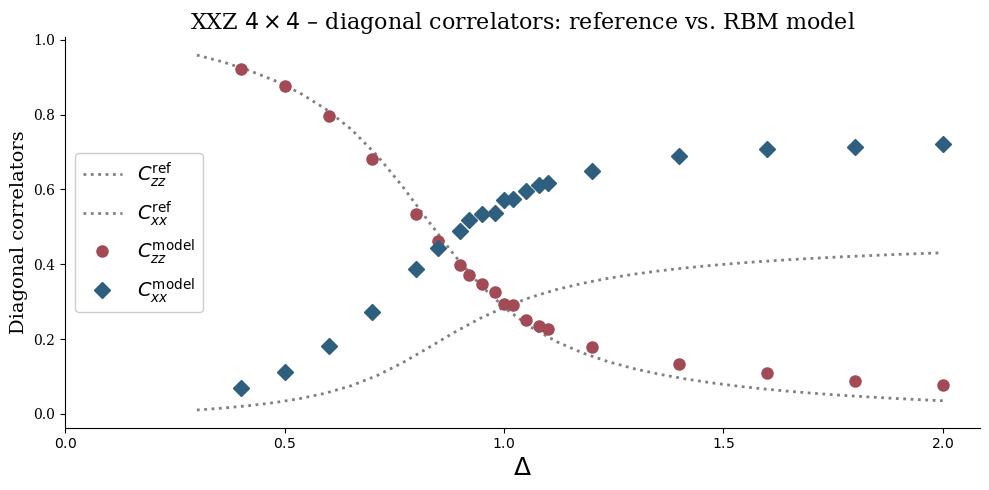

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# colors + fonts
english_red   = '#a24a55'
bdazzled_blue = '#2e5f7f'
plt.rcParams.update({"font.family": "serif"})

# load data
ref_df   = pd.read_csv("xxz_4x4_correlations_ref.csv")
model_df = pd.read_csv("xxz_4x4_correlations_rbm.csv")

# quick sanity check (optional)
print(ref_df.head())
print(model_df.head())

fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax.set_facecolor('white')

# reference curves (grey dotted lines, no markers)
ax.plot(
    ref_df["delta"], ref_df["czz_diag"],
    ':', color='gray', linewidth=2.0,
    label=r'$C_{zz}^{\mathrm{ref}}$',
    zorder=1
)
ax.plot(
    ref_df["delta"], ref_df["cxx_diag"],
    ':', color='gray', linewidth=2.0,
    label=r'$C_{xx}^{\mathrm{ref}}$',
    zorder=1
)

# model points (colored markers)
ax.plot(
    model_df["delta"], model_df["czz_diag"],
    'o', color=english_red, markersize=8,
    label=r'$C_{zz}^{\mathrm{model}}$',
    zorder=2
)
ax.plot(
    model_df["delta"], model_df["cxx_diag"],
    'D', color=bdazzled_blue, markersize=8,
    label=r'$C_{xx}^{\mathrm{model}}$',
    zorder=2
)

# axes labels / title
ax.set_xlabel(r'$\Delta$', fontsize=18)
ax.set_ylabel('Diagonal correlators', fontsize=14)
ax.set_title(r'XXZ $4 \times 4$ – diagonal correlators: reference vs. RBM model',
             fontsize=16)

# nice x-ticks in steps of 0.5 (adjust if needed)
delta_min = ref_df["delta"].min()
delta_max = ref_df["delta"].max()
lo = np.floor(delta_min * 2) / 2
hi = np.ceil(delta_max * 2) / 2 + 0.001
xticks = np.arange(lo, hi + 1e-9, 0.5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${x:.1f}$" for x in xticks])

# legend and spines
ax.legend(frameon=True, framealpha=1.0, loc='best', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('xxz_diagonal_correlators_highres.png', dpi=300)
plt.show()


Empty DataFrame
Columns: [delta, type, czz_diag, czz_diag_error, cxx_diag, cxx_diag_error]
Index: []
Empty DataFrame
Columns: [delta, type, czz_diag, czz_diag_error, cxx_diag, cxx_diag_error]
Index: []


ValueError: arange: cannot compute length

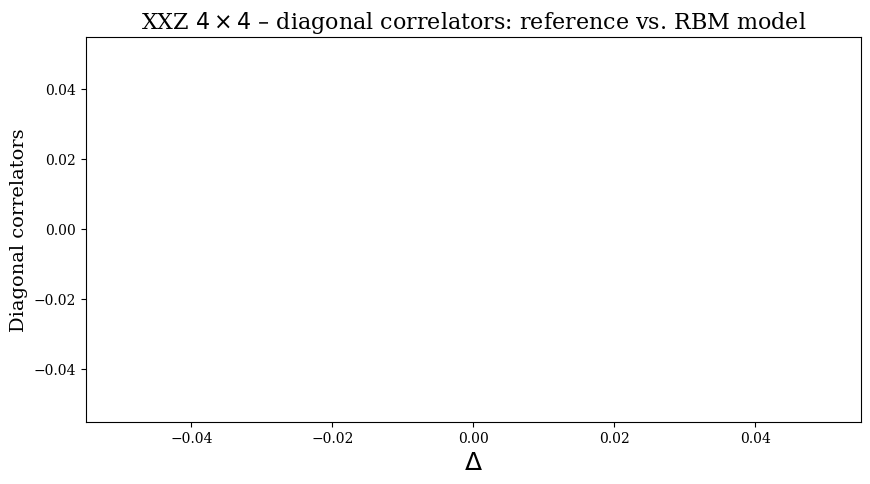

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# colors + fonts
english_red   = '#a24a55'
bdazzled_blue = '#2e5f7f'
plt.rcParams.update({"font.family": "serif"})

# ---------- load + split into two dataframes ----------
file_name = "xxz_4x4_correlations_rbm.csv"
df = pd.read_csv(file_name)

# normalize 'type' column and handle synonyms
# expected values (after this): 'ref' and 'model'
df["type"] = (
    df["type"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        "reference": "ref",
        "ref.": "ref",
        "rbm": "model",
        "rbm_model": "model"
    })
)

# ensure numeric dtypes
for col in ["delta", "czz_diag", "cxx_diag"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

ref_df   = df[df["type"] == "ref"].sort_values("delta").reset_index(drop=True)
model_df = df[df["type"] == "model"].sort_values("delta").reset_index(drop=True)

# quick sanity check (optional)
print(ref_df.head())
print(model_df.head())
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax.set_facecolor('white')

# reference curves (grey dotted lines, no markers)
ax.plot(
    ref_df["delta"], ref_df["czz_diag"],
    ':', color='gray', linewidth=2.0,
    label=r'$C_{zz}^{\mathrm{ref}}$',
    zorder=1
)
ax.plot(
    ref_df["delta"], ref_df["cxx_diag"],
    ':', color='gray', linewidth=2.0,
    label=r'$C_{xx}^{\mathrm{ref}}$',
    zorder=1
)

# model points (colored markers)
ax.plot(
    model_df["delta"], model_df["czz_diag"],
    'o', color=english_red, markersize=8,
    label=r'$C_{zz}^{\mathrm{model}}$',
    zorder=2
)
ax.plot(
    model_df["delta"], model_df["cxx_diag"],
    'D', color=bdazzled_blue, markersize=8,
    label=r'$C_{xx}^{\mathrm{model}}$',
    zorder=2
)

# axes labels / title
ax.set_xlabel(r'$\Delta$', fontsize=18)
ax.set_ylabel('Diagonal correlators', fontsize=14)
ax.set_title(r'XXZ $4 \times 4$ – diagonal correlators: reference vs. RBM model',
             fontsize=16)

# nice x-ticks in steps of 0.5 (adjust if needed)
delta_min = ref_df["delta"].min()
delta_max = ref_df["delta"].max()
lo = np.floor(delta_min * 2) / 2
hi = np.ceil(delta_max * 2) / 2 + 0.001
xticks = np.arange(lo, hi + 1e-9, 0.5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${x:.1f}$" for x in xticks])

# legend and spines
ax.legend(frameon=True, framealpha=1.0, loc='best', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('xxz_diagonal_correlators_highres.png', dpi=300)
plt.show()
